In [1]:
import csv, math, os

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
best_results_path = "../data/jss/imrg/ds1/best/testbed1_small.csv"

In [4]:
def read_csv_results(file_path):
    best_results = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)
        for row in csv_reader:
            best_results.append({'filename': row[0], 'cost': row[1]})

    return best_results

best = read_csv_results(best_results_path)

best[0]

{'filename': 't1s_0001', 'cost': '663'}

In [5]:
def compute_metrics(results, best):
    total_difference = 0
    total_squared_difference = 0
    total_costs = 0

    # To calculate standard deviation, we need individual costs
    costs = []

    for i in range(len(results)):
        cost = float(results[i]['cost'])
        best_cost = float(best[i]['cost'])
        cost_difference = cost - best_cost
        relative_difference = (cost_difference / best_cost) * 100
        total_difference += abs(cost_difference)
        total_squared_difference += cost_difference ** 2
        total_costs += cost
        costs.append(cost)

    mae = total_difference / len(results)
    rmse = math.sqrt(total_squared_difference / len(results))

    # Calculate mean cost
    mean_cost = total_costs / len(results)

    # Calculate standard deviation
    total_squared_deviation = sum((cost - mean_cost) ** 2 for cost in costs)
    std_deviation = math.sqrt(total_squared_deviation / len(results))

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Standard Deviation: {std_deviation}")

    return mae, rmse, std_deviation

# Example usage:
# results = [{'cost': 250}, {'cost': 260}, {'cost': 240}]
# best = [{'cost': 240}, {'cost': 250}, {'cost': 230}]
# compute_metrics(results, best)

In [6]:
results_folders = ['epoch100', 'epoch200', 'epoch500', 'epoch1000',
    'epoch1400', 'epoch6900', 'epoch13800', 'epoch27500', 'epoch41500']

In [7]:
def compute_results(main_path):
    for folder in results_folders:
        base_path = os.path.join(main_path, folder)
        meal_path = os.path.join(base_path, "meal.csv")
        mhac_path = os.path.join(base_path, "mhac.csv")

        print(f"\nComputing metrics for {folder}")
        if not os.path.exists(mhac_path):
            print(f"File {mhac_path} does not exist")
            continue
        if not os.path.exists(meal_path):
            print(f"File {meal_path} does not exist")
            continue

        meal = read_csv_results(meal_path)
        mhac = read_csv_results(mhac_path)

        print("Mhac")
        compute_metrics(mhac, best)
        print("Meal")
        compute_metrics(meal, best)

print("SA")
compute_results("results/SA/")
print("\n\nGA")
compute_results("results/GA/")
print("\n\nACO")
compute_results("results/ACO/")

SA

Computing metrics for epoch100
File results/SA/epoch100/mhac.csv does not exist

Computing metrics for epoch200
File results/SA/epoch200/mhac.csv does not exist

Computing metrics for epoch500
File results/SA/epoch500/mhac.csv does not exist

Computing metrics for epoch1000
File results/SA/epoch1000/mhac.csv does not exist

Computing metrics for epoch1400
Mhac
Mean Absolute Error (MAE): 3103.9416666666666
Root Mean Squared Error (RMSE): 4522.723944151357
Standard Deviation: 4293.380512550434
Meal
Mean Absolute Error (MAE): 4227.105555555556
Root Mean Squared Error (RMSE): 5857.466927397503
Standard Deviation: 5061.238856468071

Computing metrics for epoch6900
Mhac
Mean Absolute Error (MAE): 3079.1694444444443
Root Mean Squared Error (RMSE): 4486.23204030336
Standard Deviation: 4265.381204034762
Meal
Mean Absolute Error (MAE): 4089.5
Root Mean Squared Error (RMSE): 5728.907756089094
Standard Deviation: 5002.802138317516

Computing metrics for epoch13800
Mhac
Mean Absolute Error (MAE

In [8]:
cpp_results = {
    "SA": {
        "epoch1400": {
            "time": 11,
            "mae": 3103,
            "rmse": 4522,
            "std_dev": 4293
        },
        "epoch6900": {
            "time": 53,
            "mae": 3079,
            "rmse": 4486,
            "std_dev": 4265
        },
        "epoch13800": {
            "time": 139,
            "mae": 3071,
            "rmse": 4474,
            "std_dev": 4255
        },
        "epoch27500": {
            "time": 239,
            "mae": 3072,
            "rmse": 4475,
            "std_dev": 4256
        },
        "epoch41500": {
            "time": 318,
            "mae": 3073,
            "rmse": 4477,
            "std_dev": 4258
        }
    },
    "GA": {
        "epoch100": {
            "time": 32,
            "mae": 3102,
            "rmse": 4514,
            "std_dev": 4284
        },
        "epoch200": {
            "time": 57,
            "mae": 3099,
            "rmse": 4515,
            "std_dev": 4286
        },
        "epoch500": {
            "time": 152,
            "mae": 3094,
            "rmse": 4507,
            "std_dev": 4279
        },
        "epoch1000": {
            "time": 229,
            "mae": 3095,
            "rmse": 4505,
            "std_dev": 4277
        },
        "epoch1400": {
            "time": 445,
            "mae": 3091,
            "rmse": 4504,
            "std_dev": 4278
        },
        "epoch6900": {
            "time": 1900
        },
        "epoch13800": {
            "time": 3755
        }
    },
    "ACO": {
        "epoch100": {
            "time": 37,
            "mae": 3445,
            "rmse": 4859,
            "std_dev": 4476
        },
        "epoch200": {
            "time": 76,
            "mae": 3443,
            "rmse": 4840,
            "std_dev": 4462
        },
        "epoch500": {
            "time": 163,
            "mae": 3405,
            "rmse": 4802,
            "std_dev": 4435
        },
        "epoch1000": {
            "time": 320,
            "mae": 3392,
            "rmse": 4783,
            "std_dev": 4419
        },
        "epoch1400": {
            "time": 424,
            "mae": 3387,
            "rmse": 4771,
            "std_dev": 4408
        },
        "epoch6900": {
            "time": 2055
        },
        "epoch13800": {
            "time": 3939
        }
    }
}

In [9]:
cpp_python_results = {
    "SA": {
        "epoch1400": {
            "time": 90,
        },
        "epoch6900": {
            "time": 500,
        },
        "epoch13800": {
            "time": 876,
        },
        "epoch27500": {
            "time": 1751,
        },
        "epoch41500": {
            "time": 2725,
        }
    },
    "GA": {
        "epoch100": {
            "time": 311,
        },
        "epoch200": {
            "time": 628,
        },
        "epoch500": {
            "time": 1369,
        },
        "epoch1000": {
            "time": 2637,
        },
        "epoch1400": {
            "time": 3796,
        },
    },
    "ACO": {
        "epoch100": {
            "time": 340,
        },
        "epoch200": {
            "time": 915,
        },
        "epoch500": {
            "time": 2091,
        },
        "epoch1000": {
            "time": 4257,
        },
        "epoch1400": {
            "time": 6421,
        }
    }
}

In [10]:
meal_results = {
    "SA": {
        "epoch1400": {
            "time": 132,
            "mae": 4227,
            "rmse": 5857,
            "std_dev": 5061

        },
        "epoch6900": {
            "time": 748,
            "mae": 4089,
            "rmse": 5728,
            "std_dev": 5002
        },
        "epoch13800": {
            "time": 1519,
            "mae": 4085,
            "rmse": 5712,
            "std_dev": 4985
        },
        "epoch27500": {
            "time": 3165,
            "mae": 4061,
            "rmse": 5679,
            "std_dev": 4960
        },
        "epoch41500": {
            "time": 4783,
            "mae": 4056,
            "rmse": 5702,
            "std_dev": 4994
        }
    },
    "GA": {
        "epoch100": {
            "time": 614,
            "mae": 3863,
            "rmse": 5457,
            "std_dev": 4830
        },
        "epoch200": {
            "time": 975,
            "mae": 3852,
            "rmse": 5428,
            "std_dev": 4809
        },
        "epoch500": {
            "time": 1851,
            "mae": 3813,
            "rmse": 5396,
            "std_dev": 4789
        },
        "epoch1000": {
            "time": 3753,
            "mae": 3798,
            "rmse": 5376,
            "std_dev": 4775
        },
        "epoch1400": {
            "time": 5074,
            "mae": 3789,
            "rmse": 5370,
            "std_dev": 4773
        },
        # "epoch6900": 0,
        # "epoch13800": 0
    },
    "ACO": {
        "epoch100": {
            "time": 675,
            "mae": 3855,
            "rmse": 5441,
            "std_dev": 4814
        },
        "epoch200": {
            "time": 1534,
            "mae": 3844,
            "rmse": 5425,
            "std_dev": 4799
        },
        "epoch500": {
            "time": 3410,
            "mae": 3846,
            "rmse": 5428,
            "std_dev": 4802
        },
        "epoch1000": {
            "time": 6499,
            "mae": 3837,
            "rmse": 5417,
            "std_dev": 4796
        },
        "epoch1400": {
            "time": 8231,
            "mae": 3833,
            "rmse": 5411,
            "std_dev": 4790
        },
        # "epoch6900": 0,
        # "epoch13800": 0
    }
}

In [11]:
def plot_algorithm_times_improved(algo_name):
    # Extract unique epochs across all datasets
    all_epochs = set(cpp_results[algo_name].keys()) | set(cpp_python_results[algo_name].keys()) | set(meal_results[algo_name].keys())
    sorted_epochs = sorted(all_epochs, key=lambda x: int(x.replace('epoch', '')))

    # Get times for each dataset
    cpp_times = [cpp_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]
    cpp_py_times = [cpp_python_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]
    meal_times = [meal_results[algo_name].get(epoch, {}).get('time') for epoch in sorted_epochs]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], cpp_times, label='mhac', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], cpp_py_times, label='mhac + Python', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in sorted_epochs], meal_times, label='meal (Python)', marker='o')
    plt.title(f'Execution Time Comparison for {algo_name}')
    plt.xlabel('Epoch')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid(True)
    plt.show()

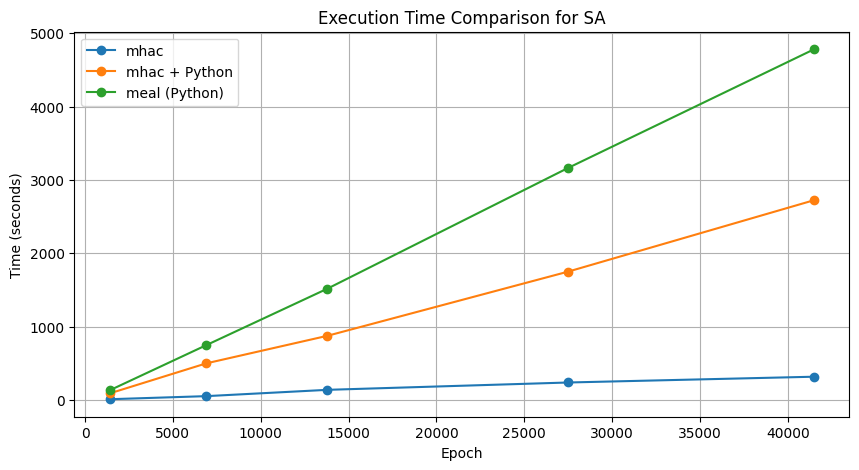

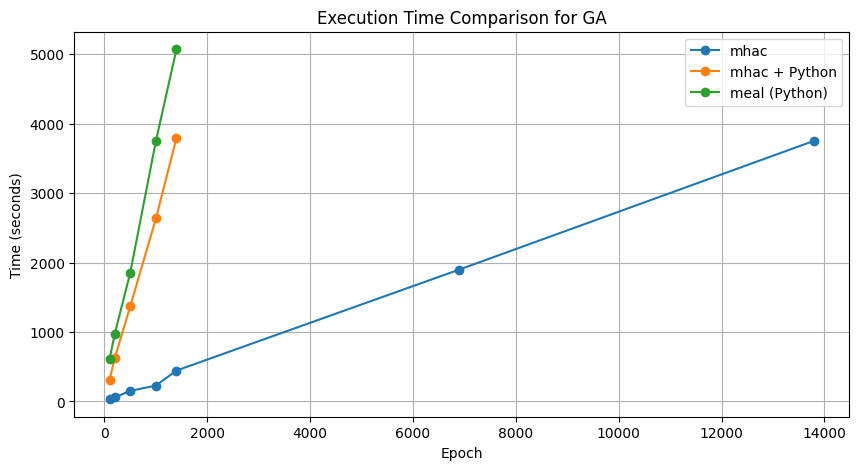

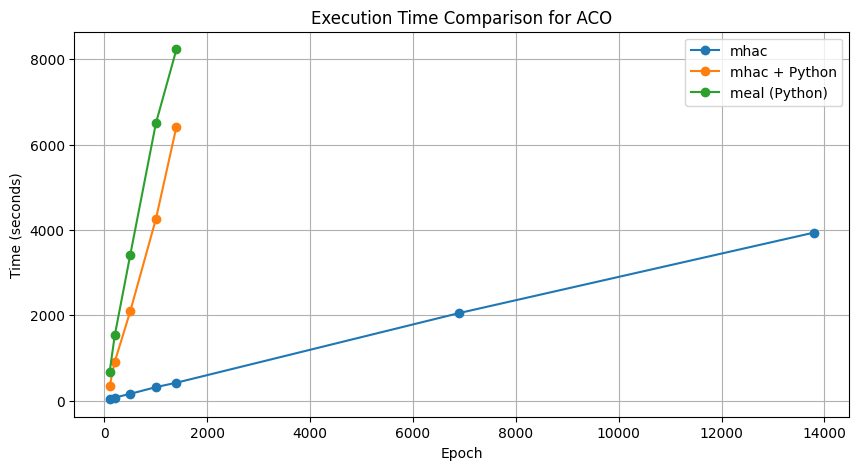

In [12]:
# Plotting for each algorithm
for algo in ['SA', 'GA', 'ACO']:
    plot_algorithm_times_improved(algo)

In [13]:
# Function to plot MAE or RMSE for a given algorithm
def plot_metric_comparison(algo_name, metric):
    # Ensure both datasets have the metric for the epoch
    common_epochs = set(cpp_results[algo_name].keys()) & set(meal_results[algo_name].keys())
    epochs = sorted(common_epochs, key=lambda x: int(x.replace('epoch', '')))
    
    # Filtering epochs to those having the metric in both datasets
    filtered_epochs = [epoch for epoch in epochs if metric in cpp_results[algo_name][epoch] and metric in meal_results[algo_name][epoch]]

    # Collecting metric values
    cpp_metric = [cpp_results[algo_name][epoch][metric] for epoch in filtered_epochs]
    meal_metric = [meal_results[algo_name][epoch][metric] for epoch in filtered_epochs]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot([int(epoch.replace('epoch', '')) for epoch in filtered_epochs], cpp_metric, label='mhac', marker='o')
    plt.plot([int(epoch.replace('epoch', '')) for epoch in filtered_epochs], meal_metric, label='meal', marker='o')
    plt.title(f'{metric} Comparison for {algo_name}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

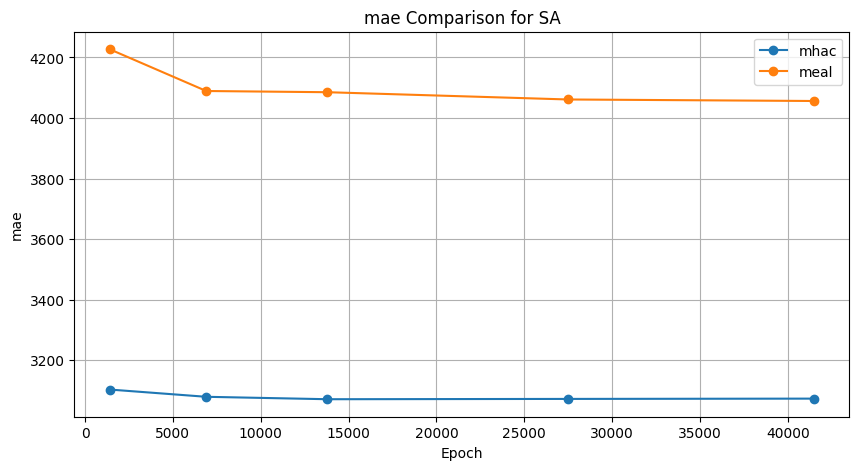

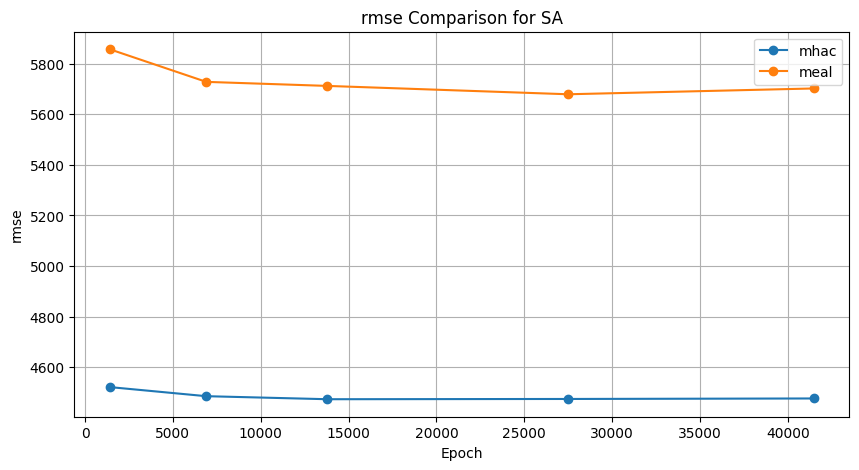

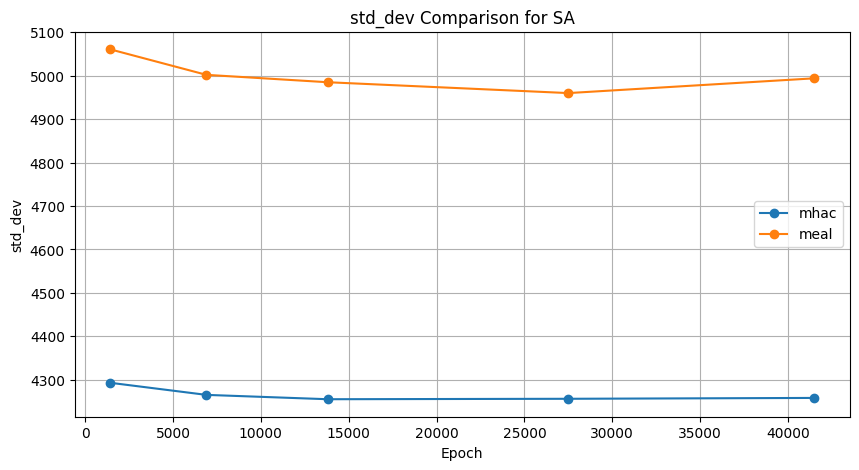

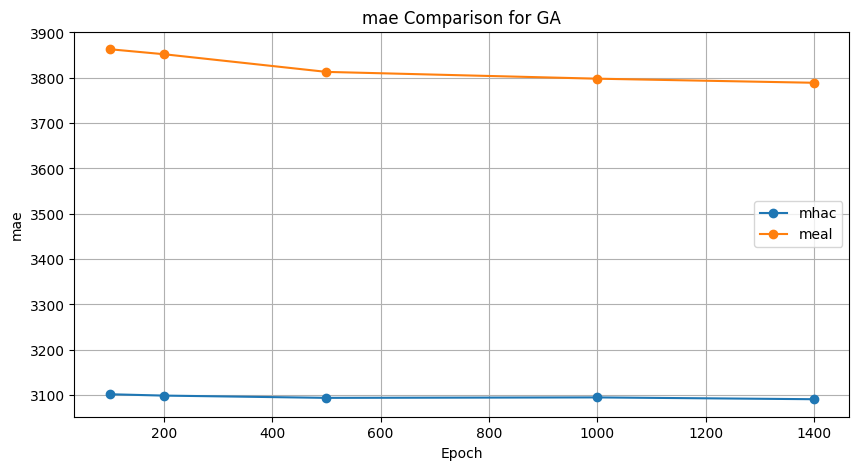

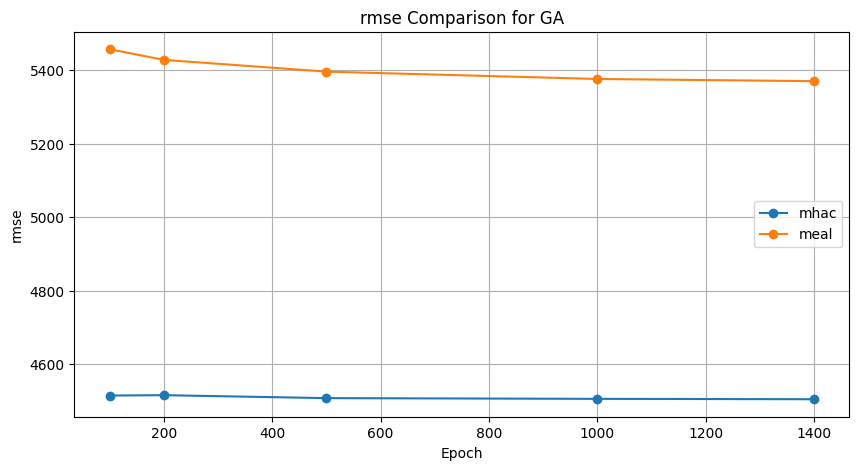

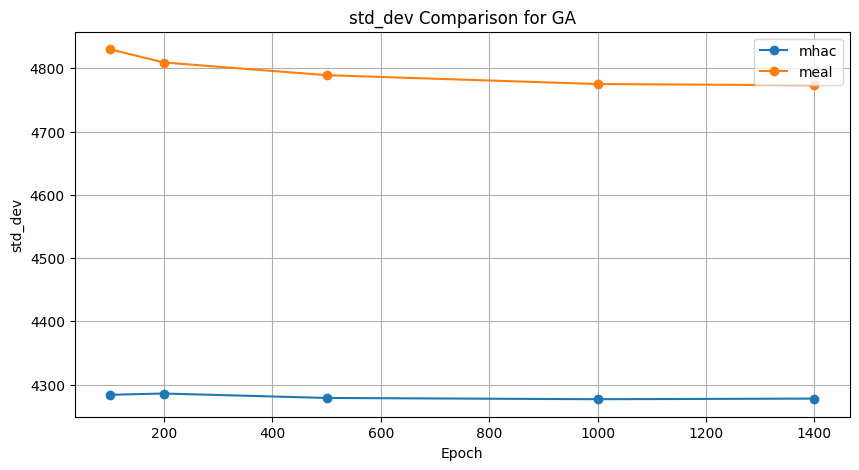

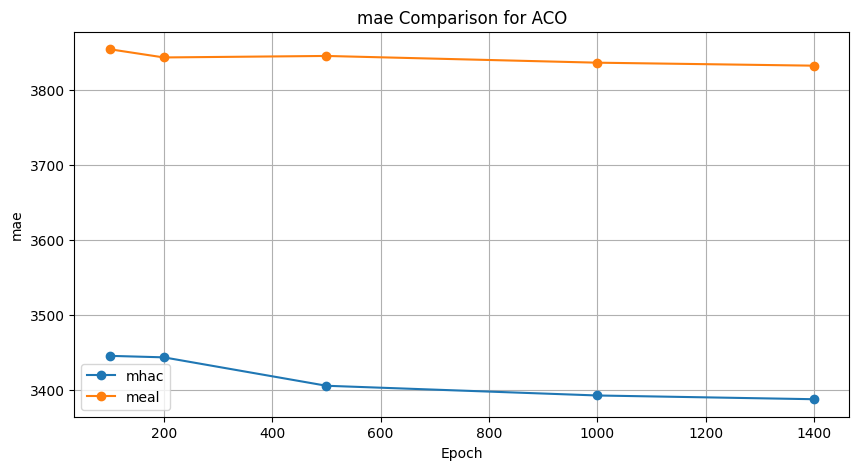

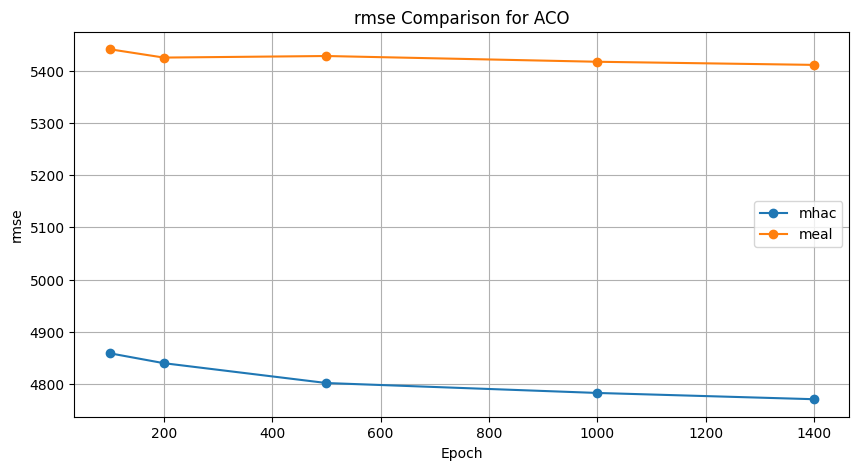

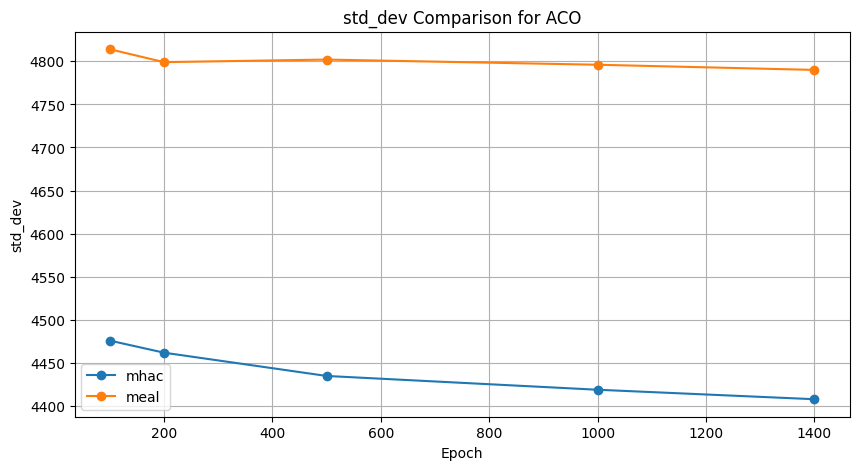

In [14]:
# Plotting for each algorithm
for algo in ['SA', 'GA', 'ACO']:
    for metric_to_plot in ['mae', 'rmse', 'std_dev']:
        plot_metric_comparison(algo, metric_to_plot)

In [15]:
# Function to plot a specified metric (either RMSE or MAE) against time with a logarithmic x-axis
def plot_metric_vs_time_log_scale(metric):
    plt.figure(figsize=(12, 7))
    colors = ['b', 'g', 'r']  # Colors for SA, GA, ACO respectively
    markers = ['o', '^', 's']  # Different markers for each algorithm

    for i, algo_name in enumerate(['SA', 'GA', 'ACO']):
        # Collecting data
        cpp_times = []
        cpp_metrics = []
        meal_times = []
        meal_metrics = []

        cpp_epochs = [int(epoch.replace('epoch', '')) for epoch in cpp_results[algo_name] if 'mae' in cpp_results[algo_name][epoch]]
        meal_epochs = [int(epoch.replace('epoch', '')) for epoch in meal_results[algo_name] if 'mae' in meal_results[algo_name][epoch]]
        
        # Collect data for C++
        for epoch, data in cpp_results[algo_name].items():
            if metric in data and 'time' in data:
                cpp_times.append(data['time'])
                cpp_metrics.append(data[metric])

        # Collect data for mealpy
        for epoch, data in meal_results[algo_name].items():
            if metric in data and 'time' in data:
                meal_times.append(data['time'])
                meal_metrics.append(data[metric])

        print(cpp_epochs)
        print(cpp_metrics)

        # Plotting using a semilogx scale for the time
        if cpp_metrics and cpp_times:
            # plt.semilogx(cpp_epochs, cpp_metrics, label=f'mhac {algo_name}', marker=markers[i], color=colors[i], linestyle='-')
            plt.semilogx(cpp_times, cpp_metrics, label=f'mhac {algo_name}', marker=markers[i], color=colors[i], linestyle='-')
        if meal_metrics and meal_times:
            # plt.semilogx(meal_epochs, meal_metrics, label=f'meal {algo_name}', marker=markers[i], color=colors[i], linestyle='--')
            plt.semilogx(meal_times, meal_metrics, label=f'meal {algo_name}', marker=markers[i], color=colors[i], linestyle='--')


    plt.title(f'{metric.upper()} vs Time (Log Scale) Across Algorithms')
    plt.xlabel('Time (seconds, log scale)')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

[1400, 6900, 13800, 27500, 41500]
[3103, 3079, 3071, 3072, 3073]
[100, 200, 500, 1000, 1400]
[3102, 3099, 3094, 3095, 3091]
[100, 200, 500, 1000, 1400]
[3445, 3443, 3405, 3392, 3387]


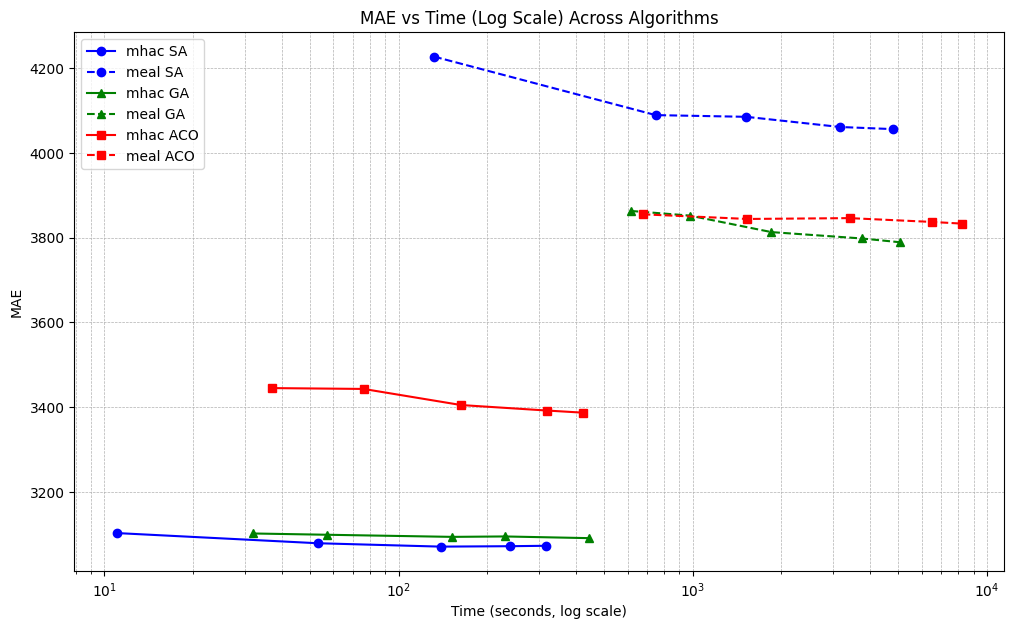

[1400, 6900, 13800, 27500, 41500]
[4522, 4486, 4474, 4475, 4477]
[100, 200, 500, 1000, 1400]
[4514, 4515, 4507, 4505, 4504]
[100, 200, 500, 1000, 1400]
[4859, 4840, 4802, 4783, 4771]


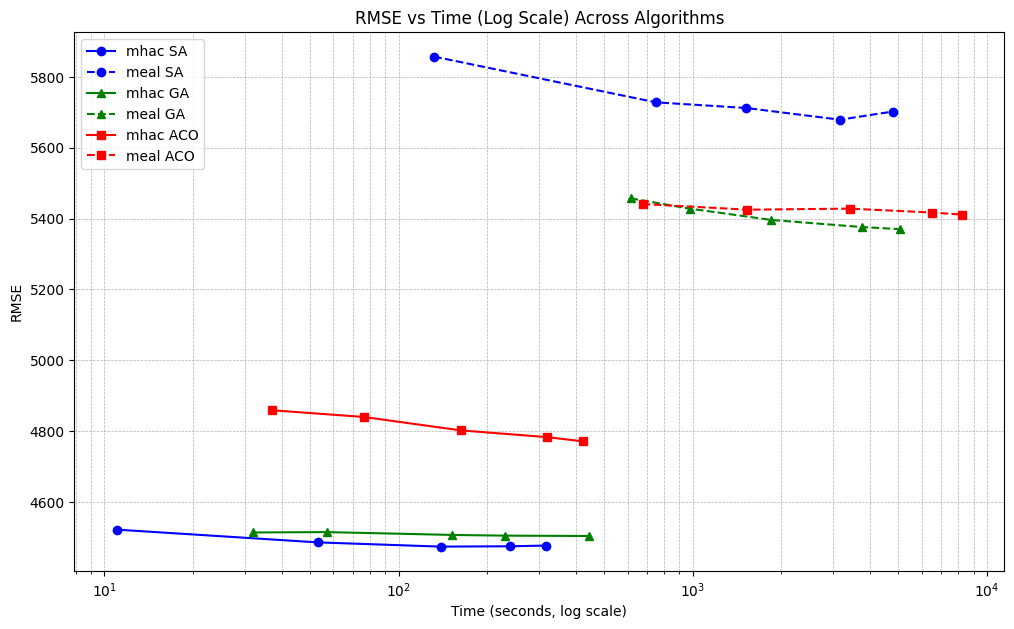

[1400, 6900, 13800, 27500, 41500]
[4293, 4265, 4255, 4256, 4258]
[100, 200, 500, 1000, 1400]
[4284, 4286, 4279, 4277, 4278]
[100, 200, 500, 1000, 1400]
[4476, 4462, 4435, 4419, 4408]


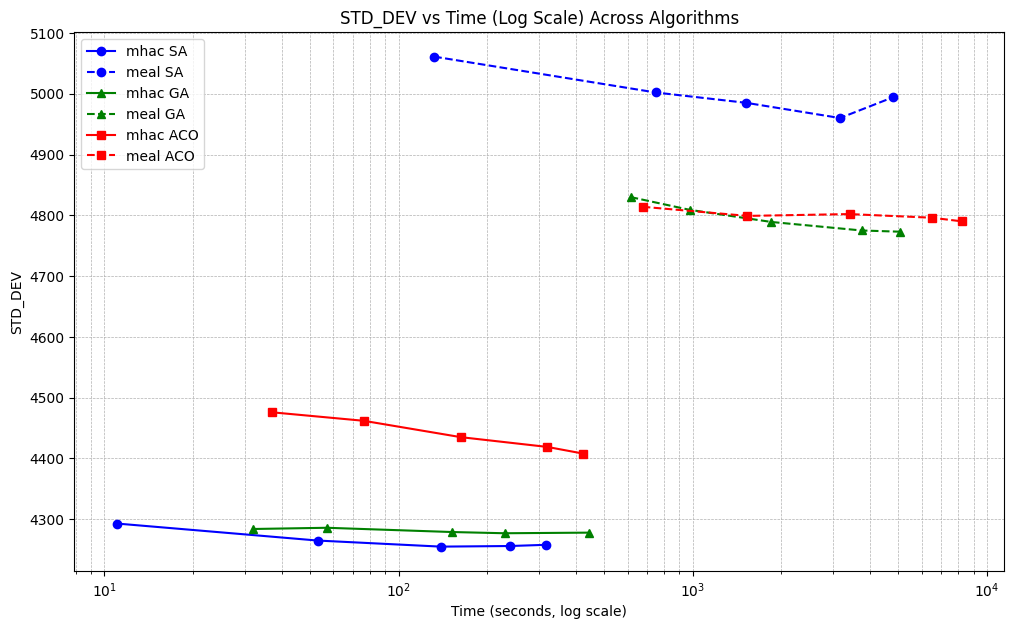

In [16]:
for metric in ['mae', 'rmse', 'std_dev']:
    plot_metric_vs_time_log_scale(metric)

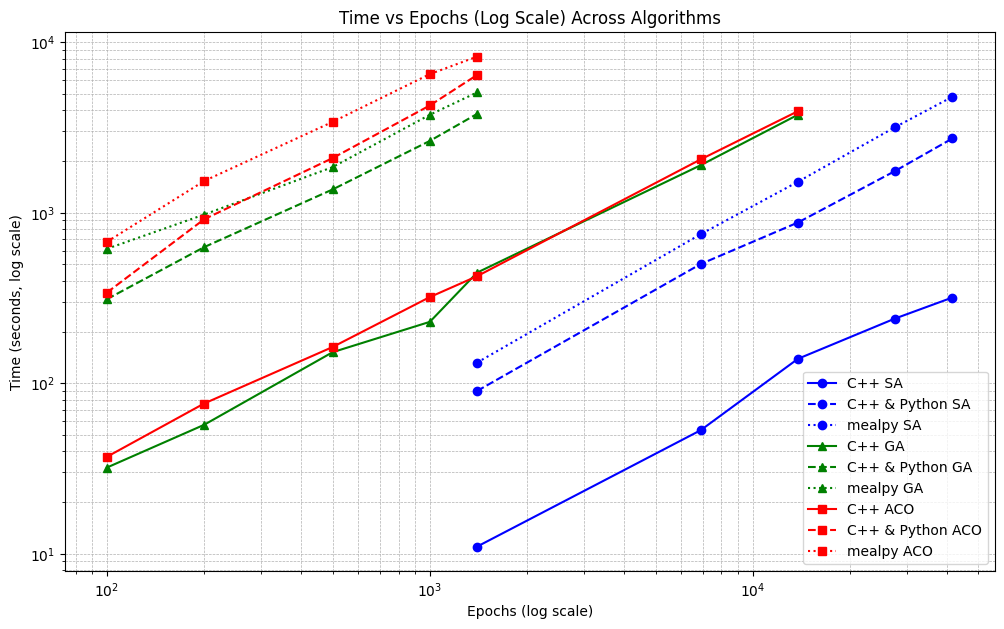

In [17]:
# Function to plot Time against Epochs using logarithmic scale for both axes
def plot_time_vs_epochs_log_scale():
    plt.figure(figsize=(12, 7))
    colors = ['b', 'g', 'r']  # Colors for SA, GA, ACO respectively
    markers = ['o', '^', 's']  # Different markers for each algorithm
    line_styles = ['-', '--', ':']  # Line styles for each dataset

    for i, algo_name in enumerate(['SA', 'GA', 'ACO']):
        # Collecting data for C++
        cpp_epochs = [int(epoch.replace('epoch', '')) for epoch in cpp_results[algo_name] if 'time' in cpp_results[algo_name][epoch]]
        cpp_times = [cpp_results[algo_name][epoch]['time'] for epoch in cpp_results[algo_name] if 'time' in cpp_results[algo_name][epoch]]

        # Collecting data for C++ with Python
        cpp_py_epochs = [int(epoch.replace('epoch', '')) for epoch in cpp_python_results[algo_name] if 'time' in cpp_python_results[algo_name][epoch]]
        cpp_py_times = [cpp_python_results[algo_name][epoch]['time'] for epoch in cpp_python_results[algo_name] if 'time' in cpp_python_results[algo_name][epoch]]

        # Collecting data for mealpy
        meal_epochs = [int(epoch.replace('epoch', '')) for epoch in meal_results[algo_name] if 'time' in meal_results[algo_name][epoch]]
        meal_times = [meal_results[algo_name][epoch]['time'] for epoch in meal_results[algo_name] if 'time' in meal_results[algo_name][epoch]]

        # Plotting using a loglog scale
        if cpp_times:
            plt.loglog(cpp_epochs, cpp_times, label=f'C++ {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[0])
        if cpp_py_times:
            plt.loglog(cpp_py_epochs, cpp_py_times, label=f'C++ & Python {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[1])
        if meal_times:
            plt.loglog(meal_epochs, meal_times, label=f'mealpy {algo_name}', marker=markers[i], color=colors[i], linestyle=line_styles[2])

    plt.title('Time vs Epochs (Log Scale) Across Algorithms')
    plt.xlabel('Epochs (log scale)')
    plt.ylabel('Time (seconds, log scale)')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

plot_time_vs_epochs_log_scale()

In [18]:
def compute_speedups(cpp_times, cpp_py_times, meal_times):
    # Compute speedups, assuming non-zero times to avoid division by zero
    cpp_vs_cpp_py = [cpp / cpp_py if cpp_py else None for cpp, cpp_py in zip(cpp_times, cpp_py_times)]
    cpp_vs_meal = [cpp / meal if meal else None for cpp, meal in zip(cpp_times, meal_times)]
    cpp_py_vs_meal = [cpp_py / meal if meal else None for cpp_py, meal in zip(cpp_py_times, meal_times)]

    return cpp_vs_cpp_py, cpp_vs_meal, cpp_py_vs_meal


for algo in ['SA', 'GA', 'ACO']:
    common_epochs = set(cpp_results[algo].keys()) & set(cpp_python_results[algo].keys()) & set(meal_results[algo].keys())
    cpp_times = [cpp_results[algo][epoch]['time'] for epoch in common_epochs]
    cpp_py_times = [cpp_python_results[algo][epoch]['time'] for epoch in common_epochs]
    meal_times = [meal_results[algo][epoch]['time'] for epoch in common_epochs]

    cpp_vs_cpp_py, cpp_vs_meal, cpp_py_vs_meal = compute_speedups(cpp_times, cpp_py_times, meal_times)

    print(f"Speedups for {algo}:")
    print(f"C++ vs C++ with Python: {cpp_vs_cpp_py}")
    print(f"C++ vs mealpy: {cpp_vs_meal}")
    print(f"C++ with Python vs mealpy: {cpp_py_vs_meal}")

Speedups for SA:
C++ vs C++ with Python: [0.158675799086758, 0.13649343232438607, 0.12222222222222222, 0.11669724770642202, 0.106]
C++ vs mealpy: [0.09150757077024359, 0.07551342812006319, 0.08333333333333333, 0.06648546937068785, 0.07085561497326204]
C++ with Python vs mealpy: [0.5766951942067149, 0.5532385466034755, 0.6818181818181818, 0.5697261133180013, 0.6684491978609626]
Speedups for GA:
C++ vs C++ with Python: [0.1110299488677867, 0.11722866174920969, 0.10289389067524116, 0.08684110731892301, 0.09076433121019108]
C++ vs mealpy: [0.08211777417612101, 0.08770201024832479, 0.05211726384364821, 0.06101785238475886, 0.05846153846153846]
C++ with Python vs mealpy: [0.7396002160994057, 0.7481277098935751, 0.506514657980456, 0.7026378896882494, 0.6441025641025641]
Speedups for ACO:
C++ vs C++ with Python: [0.0779531324725012, 0.06603332814203396, 0.10882352941176471, 0.07517030772844727, 0.08306010928961749]
C++ vs mealpy: [0.04780058651026393, 0.051512574413801485, 0.054814814814814816